<a href="https://colab.research.google.com/github/Nyawira12/Unsupervised-Learning-with-R/blob/main/Associative_Analsysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding 

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

# 2. Success Metrics

- Identify relationships between variables. 


# 3. Understanding the Context

The retail space is in Kenya highly competitive, survival strategies depends  on the enity's ability to retain and grow its market shares. This makes an analysis of relevant marketing strategies a possible source of competitive advantage. This section will focus on association analysis. 

# 4. Expermental Design

1. Import Libraries & Read Data
2. EDA
3. Implementing the Solution
4. Conclusion

# 5. Reading the data and importing the required libraries.

In [1]:
# We first we install the required arules library 
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
# load arules library
library(arules)
# load the data 
url = "/content/Supermarket_Sales_Dataset II.csv"
Df2 <- read.transactions(url)

Warning message in asMethod(object):
“removing duplicated items in transactions”


## 2. Check the data.

In [17]:
head(Df2)

transactions in sparse format with
 6 transactions (rows) and
 5729 items (columns)

In [12]:
# previewing our first 5 transactions
inspect(Df2[1:5])

    items                              
[1] {cheese,energy,                    
     drink,tomato,                     
     fat,                              
     flour,yams,cottage,               
     grapes,whole,                     
     juice,frozen,                     
     juice,low,                        
     mix,green,                        
     oil,                              
     shrimp,almonds,avocado,vegetables,
     smoothie,spinach,olive,           
     tea,honey,salad,mineral,          
     water,salmon,antioxydant,         
     weat,                             
     yogurt,green}                     
[2] {burgers,meatballs,eggs}           
[3] {chutney}                          
[4] {turkey,avocado}                   
[5] {bar,whole,                        
     mineral,                          
     rice,green,                       
     tea,                              
     water,milk,energy,                
     wheat}                            


In [13]:
# check type of data set
class(Df2)

[1] "transactions"
attr(,"package")
[1] "arules"

In [14]:
# find the column data types 
str(Df2)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:23299] 1087 1614 1705 1732 1993 2101 2105 2358 2444 3463 ...
  .. .. ..@ p       : int [1:7502] 0 15 16 17 18 24 27 31 33 36 ...
  .. .. ..@ Dim     : int [1:2] 5729 7501
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	5729 obs. of  1 variable:
  .. ..$ labels: chr [1:5729] "&" "accessories" "accessories,antioxydant" "accessories,champagne,fresh" ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


Most of the columns are numeric with 4 of them being non numeric.

In [6]:
# find out how many rows and columns are present in the data set
dim(df)

[1] 7501 5729

In [ ]:
#checking for missing values
colSums(is.na(Df2))

In [ ]:
# Drop olive oil column from dataframe
Df2$olive.oil <- NULL

In [ ]:
#checking for duplicated values
anyDuplicated(Df2)

## 3. Exploratory Data Analysis (EDA).

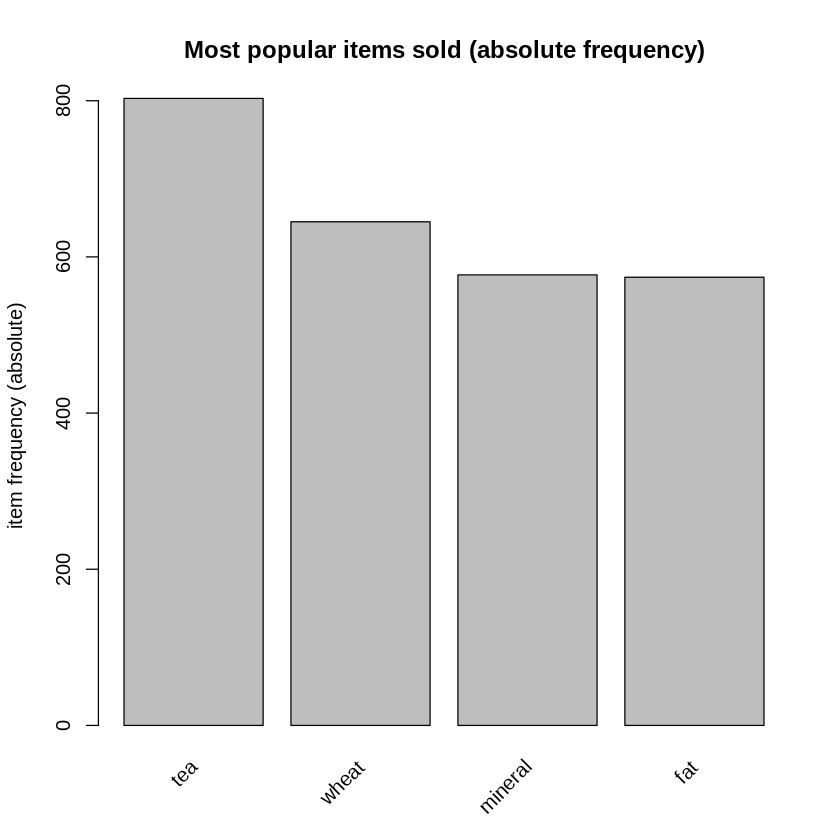

In [15]:
itemFrequencyPlot(
    Df2,
    topN=4, # Show top 4 items
    type="absolute", # absolute frequency instead of relative
    main="Most popular items sold (absolute frequency)"
)

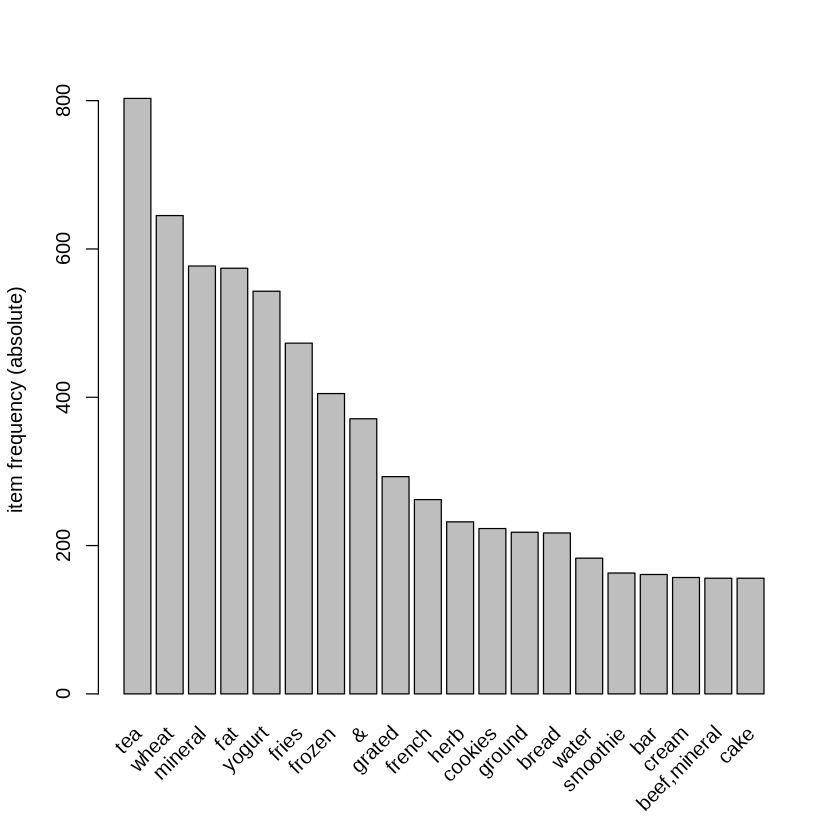

In [16]:
## Create an item frequency plot for the top 20 items
# coerce data frame into transaction. Plotting the dataframe directly fails
trans <- as(Df2, "transactions")
# plot item frequency
itemFrequencyPlot(trans,topN=20,type="absolute")

We can see that tea, wheat, mineral, fat and yoghurt are the top 5 items in terms of frequency while the least is cake and beef minerals. 


## 4. Implementing the solution.

In [18]:
# run apriori function to get the rules
association.rules <- apriori(
    Df2, 
    parameter = list(
        supp = 0.005, # Minimum support level, frequency of items
        conf = 0.8 # Minimum confidence level
    )
)

association.rules <- sort(association.rules, by = 'support', decreasing = TRUE)
summary(association.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 37 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [73 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [21 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 21 rules

rule length distribution (lhs + rhs):sizes
 2  3 
12  9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.429   3.000   3.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.005066   Min.   :0.8125   Min.   :0.005066   Min.   : 9.341  
 1st Qu.:0.005999   1st Qu.:0.9583   1st Qu.:0.005999   1st Qu.:12.244  
 Median :0.006799   Median :1.0000   Median :0.006799   Median :13.068  
 Mean   :0.014366   Mean   :0.9698   Mean   :0.015154   Mean   :13.855  
 3rd Qu.:0.009065   3rd Qu.:1.0000   3rd Qu.:0.009065   3rd Qu.:13.514  
 Max.   :0.068391   Max.   :1.0000   Max.   :0.076523   Max.   :20.218  
     count      
 Min.   : 38.0  
 1st Qu.: 45.0  
 Median : 51.0  
 Mean   :107.8  
 3rd Qu.: 68.0  
 Max.   :513.0  

mining info:
 data ntransactions support confidence
  Df2          7501   0.005        0.8

In [20]:
# preview the rules
inspect(head(association.rules))

    lhs                rhs      support     confidence coverage    lift    
[1] {yogurt}        => {fat}    0.068390881 0.9447514  0.072390348 12.34596
[2] {fat}           => {yogurt} 0.068390881 0.8937282  0.076523130 12.34596
[3] {herb}          => {&}      0.030929209 1.0000000  0.030929209 20.21833
[4] {whole}         => {wheat}  0.018930809 0.9466667  0.019997334 11.00922
[5] {rice}          => {wheat}  0.012265031 0.9583333  0.012798294 11.14490
[6] {pepper,ground} => {&}      0.009065458 1.0000000  0.009065458 20.21833
    count
[1] 513  
[2] 513  
[3] 232  
[4] 142  
[5]  92  
[6]  68  


In [21]:
# order rules by confidence
rules<-sort(association.rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                 rhs   support     confidence coverage    lift     count
[1] {herb}           => {&}   0.030929209 1          0.030929209 20.21833 232  
[2] {pepper,ground}  => {&}   0.009065458 1          0.009065458 20.21833  68  
[3] {mineral,yogurt} => {fat} 0.007732302 1          0.007732302 13.06794  58  
[4] {wheat,yogurt}   => {fat} 0.006932409 1          0.006932409 13.06794  52  
[5] {fries,green}    => {tea} 0.006799093 1          0.006799093  9.34122  51  


In [23]:

# order rules by support
rules<-sort(association.rules, by="support", decreasing=TRUE)
inspect(rules[1:5])

    lhs         rhs      support    confidence coverage   lift     count
[1] {yogurt} => {fat}    0.06839088 0.9447514  0.07239035 12.34596 513  
[2] {fat}    => {yogurt} 0.06839088 0.8937282  0.07652313 12.34596 513  
[3] {herb}   => {&}      0.03092921 1.0000000  0.03092921 20.21833 232  
[4] {whole}  => {wheat}  0.01893081 0.9466667  0.01999733 11.00922 142  
[5] {rice}   => {wheat}  0.01226503 0.9583333  0.01279829 11.14490  92  


In [24]:
# Set confidence as 0.9
rules1 <- apriori (Df2, parameter = list(supp = 0.001, conf = 0.9))
rules1

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [354 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [224 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 224 rules 

In [25]:

# summary rules
summary(rules1)

set of 224 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
 88 121  15 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.674   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.001067   Min.   :0.9000   Min.   :0.001067   Min.   :  8.492  
 1st Qu.:0.001200   1st Qu.:1.0000   1st Qu.:0.001200   1st Qu.: 11.630  
 Median :0.001466   Median :1.0000   Median :0.001466   Median : 13.068  
 Mean   :0.002696   Mean   :0.9875   Mean   :0.002749   Mean   : 23.040  
 3rd Qu.:0.002566   3rd Qu.:1.0000   3rd Qu.:0.002566   3rd Qu.: 20.218  
 Max.   :0.068391   Max.   :1.0000   Max.   :0.072390   Max.   :613.718  
     count       
 Min.   :  8.00  
 1st Qu.:  9.00  
 Median : 11.00  
 Mean   : 20.22  
 3rd Qu.: 19.25  
 Max.   :513.00  

mining info:
 data ntransactions support confidence
  Df2          7501   0.001        0.9

In [27]:
#check model rules
inspect(rules1[1:5])

    lhs                                rhs      support     confidence
[1] {cookies,low}                   => {yogurt} 0.001066524 1         
[2] {cookies,low}                   => {fat}    0.001066524 1         
[3] {extra}                         => {dark}   0.001066524 1         
[4] {burgers,whole}                 => {wheat}  0.001199840 1         
[5] {fries,escalope,pasta,mushroom} => {cream}  0.001066524 1         
    coverage    lift     count
[1] 0.001066524 13.81400 8    
[2] 0.001066524 13.06794 8    
[3] 0.001066524 83.34444 8    
[4] 0.001199840 11.62946 9    
[5] 0.001066524 47.77707 8    


In [28]:
# sort rules by confidence interval
rules1<-sort(rules1, by="confidence", decreasing=TRUE)
inspect(rules1[1:5])

    lhs                                rhs      support     confidence
[1] {cookies,low}                   => {yogurt} 0.001066524 1         
[2] {cookies,low}                   => {fat}    0.001066524 1         
[3] {extra}                         => {dark}   0.001066524 1         
[4] {burgers,whole}                 => {wheat}  0.001199840 1         
[5] {fries,escalope,pasta,mushroom} => {cream}  0.001066524 1         
    coverage    lift     count
[1] 0.001066524 13.81400 8    
[2] 0.001066524 13.06794 8    
[3] 0.001066524 83.34444 8    
[4] 0.001199840 11.62946 9    
[5] 0.001066524 47.77707 8    


In [29]:
# order rules by support
rules1<-sort(rules1, by="support", decreasing=TRUE)
inspect(rules1[1:5])


    lhs                rhs     support     confidence coverage    lift    
[1] {yogurt}        => {fat}   0.068390881 0.9447514  0.072390348 12.34596
[2] {herb}          => {&}     0.030929209 1.0000000  0.030929209 20.21833
[3] {whole}         => {wheat} 0.018930809 0.9466667  0.019997334 11.00922
[4] {rice}          => {wheat} 0.012265031 0.9583333  0.012798294 11.14490
[5] {pepper,ground} => {&}     0.009065458 1.0000000  0.009065458 20.21833
    count
[1] 513  
[2] 232  
[3] 142  
[4]  92  
[5]  68  


In [30]:
inspect(rules[1:20])

     lhs                     rhs      support     confidence coverage   
[1]  {yogurt}             => {fat}    0.068390881 0.9447514  0.072390348
[2]  {fat}                => {yogurt} 0.068390881 0.8937282  0.076523130
[3]  {herb}               => {&}      0.030929209 1.0000000  0.030929209
[4]  {whole}              => {wheat}  0.018930809 0.9466667  0.019997334
[5]  {rice}               => {wheat}  0.012265031 0.9583333  0.012798294
[6]  {pepper,ground}      => {&}      0.009065458 1.0000000  0.009065458
[7]  {mineral,yogurt}     => {fat}    0.007732302 1.0000000  0.007732302
[8]  {fat,mineral}        => {yogurt} 0.007732302 0.9666667  0.007998933
[9]  {wheat,yogurt}       => {fat}    0.006932409 1.0000000  0.006932409
[10] {fat,wheat}          => {yogurt} 0.006932409 0.8125000  0.008532196
[11] {fries,green}        => {tea}    0.006799093 1.0000000  0.006799093
[12] {cheese,herb}        => {&}      0.006532462 1.0000000  0.006532462
[13] {low}                => {fat}    0.006132516 1

An examination of the rules allows us to see what the consumers are likely to buy if their baskets contained certain items with someone buying yoghurt being likely to buy fat for example . 

In [31]:
# arulesViz to enable plottings
install.packages("arulesViz")
require(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


Loading required package: arulesViz

Loading required package: grid



In [32]:
library(arulesViz)
library(grid)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



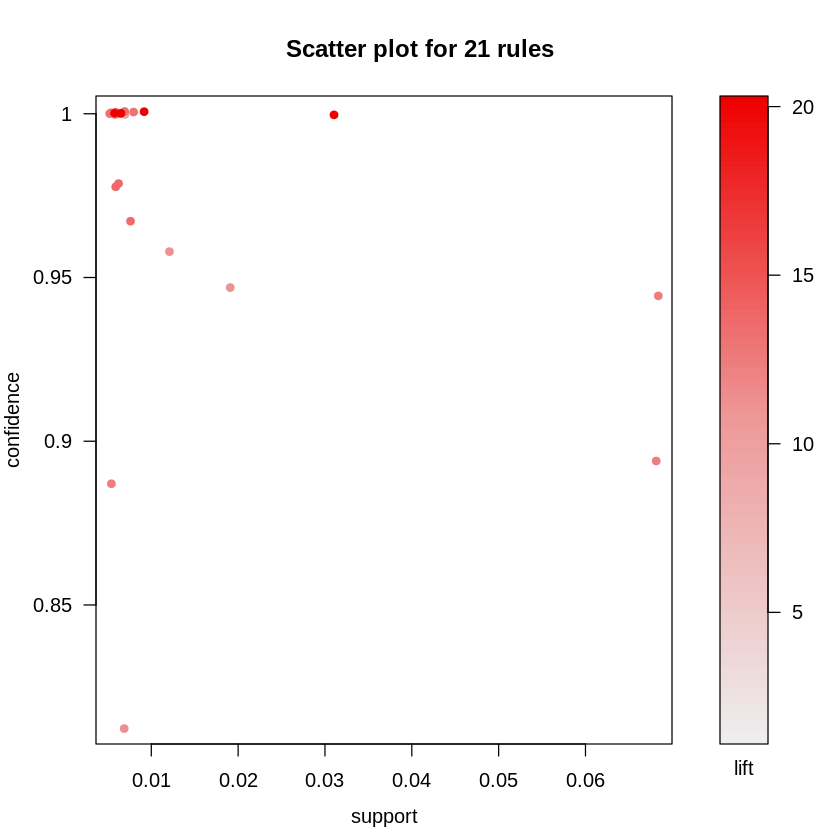

In [33]:
# plot the association rules
plot(association.rules)

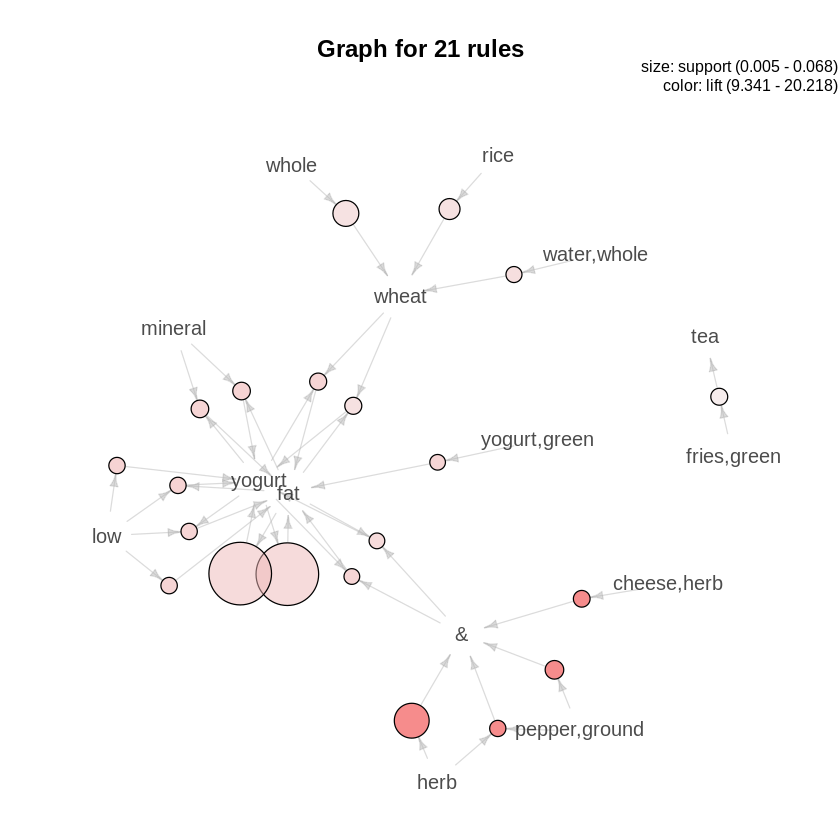

In [34]:
# association rule graphs
plot(association.rules, method="graph")

We observe from the graph that anyone who bought water rice were likely to buy wheat. 

## 5. Conclusions and recommendations.

The analysis reveals the patterns in underlying groups of data, with a set of 21 interests being identified. 